In [1]:
import numpy as np
import pandas as pd
from util import generate_number_weight, generate_digits_weight, sample_number_batch, sample_number
from util import collect_digit_arithmetic_data
from magicab import ETokenizer 
from util import _preprocess_arithmetoc_data


# Set random seed for reproducibility
np.random.seed(42)

# skewed distribution of per-digit values and number of digits
max_digits = 6
n_weight = generate_number_weight()
d_weight = generate_digits_weight(max_digits)

batch_size = 200
numbers = sample_number_batch(n_weight, d_weight, batch_size=batch_size)
data = collect_digit_arithmetic_data(numbers) 


# store data, meta-data for pt processing (target is .bin files)
# formatting for pre-training
tokenizer = ETokenizer(mode='byte')
save_dir = "data/arithmetic"
name = "train"
_preprocess_arithmetoc_data(data, tokenizer, save_dir, name)

Generating numbers: 100%|██████████| 200/200 [00:00<00:00, 18696.61it/s]


Saving 39800 train examples to data/arithmetic/train.bin


In [8]:
# validation set construction (In-Domain & Out-of-Domain)


from util import _prepare_arithmetic_data, reverse_distribution

def prepare_arithmetic_pt_data(
    save_dir, 
    tokenizer, 
    train_size, 
    val_size, 
    max_digits
): 
    
    # Set random seed for reproducibility
    np.random.seed(42)
    # skewed distribution of per-digit values and number of digits
    max_digits = 6
    n_weight = generate_number_weight()
    d_weight = generate_digits_weight(max_digits)

    train_name = "train"
    train_size = 10000
    _prepare_arithmetic_data(n_weight, d_weight, train_size, save_dir, train_name, tokenizer)

    reversed_d_weight = reverse_distribution(d_weight)
    reversed_n_weight = reverse_distribution(n_weight)

    val_size = 100
    val_name = "ood-numer"
    _prepare_arithmetic_data(reversed_n_weight, d_weight, val_size, save_dir, val_name, tokenizer)
    val_name = "ood-digit"
    _prepare_arithmetic_data(n_weight, reversed_d_weight, val_size, save_dir, val_name, tokenizer)
    val_name = "ood-both"
    _prepare_arithmetic_data(reversed_n_weight, reversed_d_weight, val_size, save_dir, val_name, tokenizer)
    

In [ ]:
# validation set construction

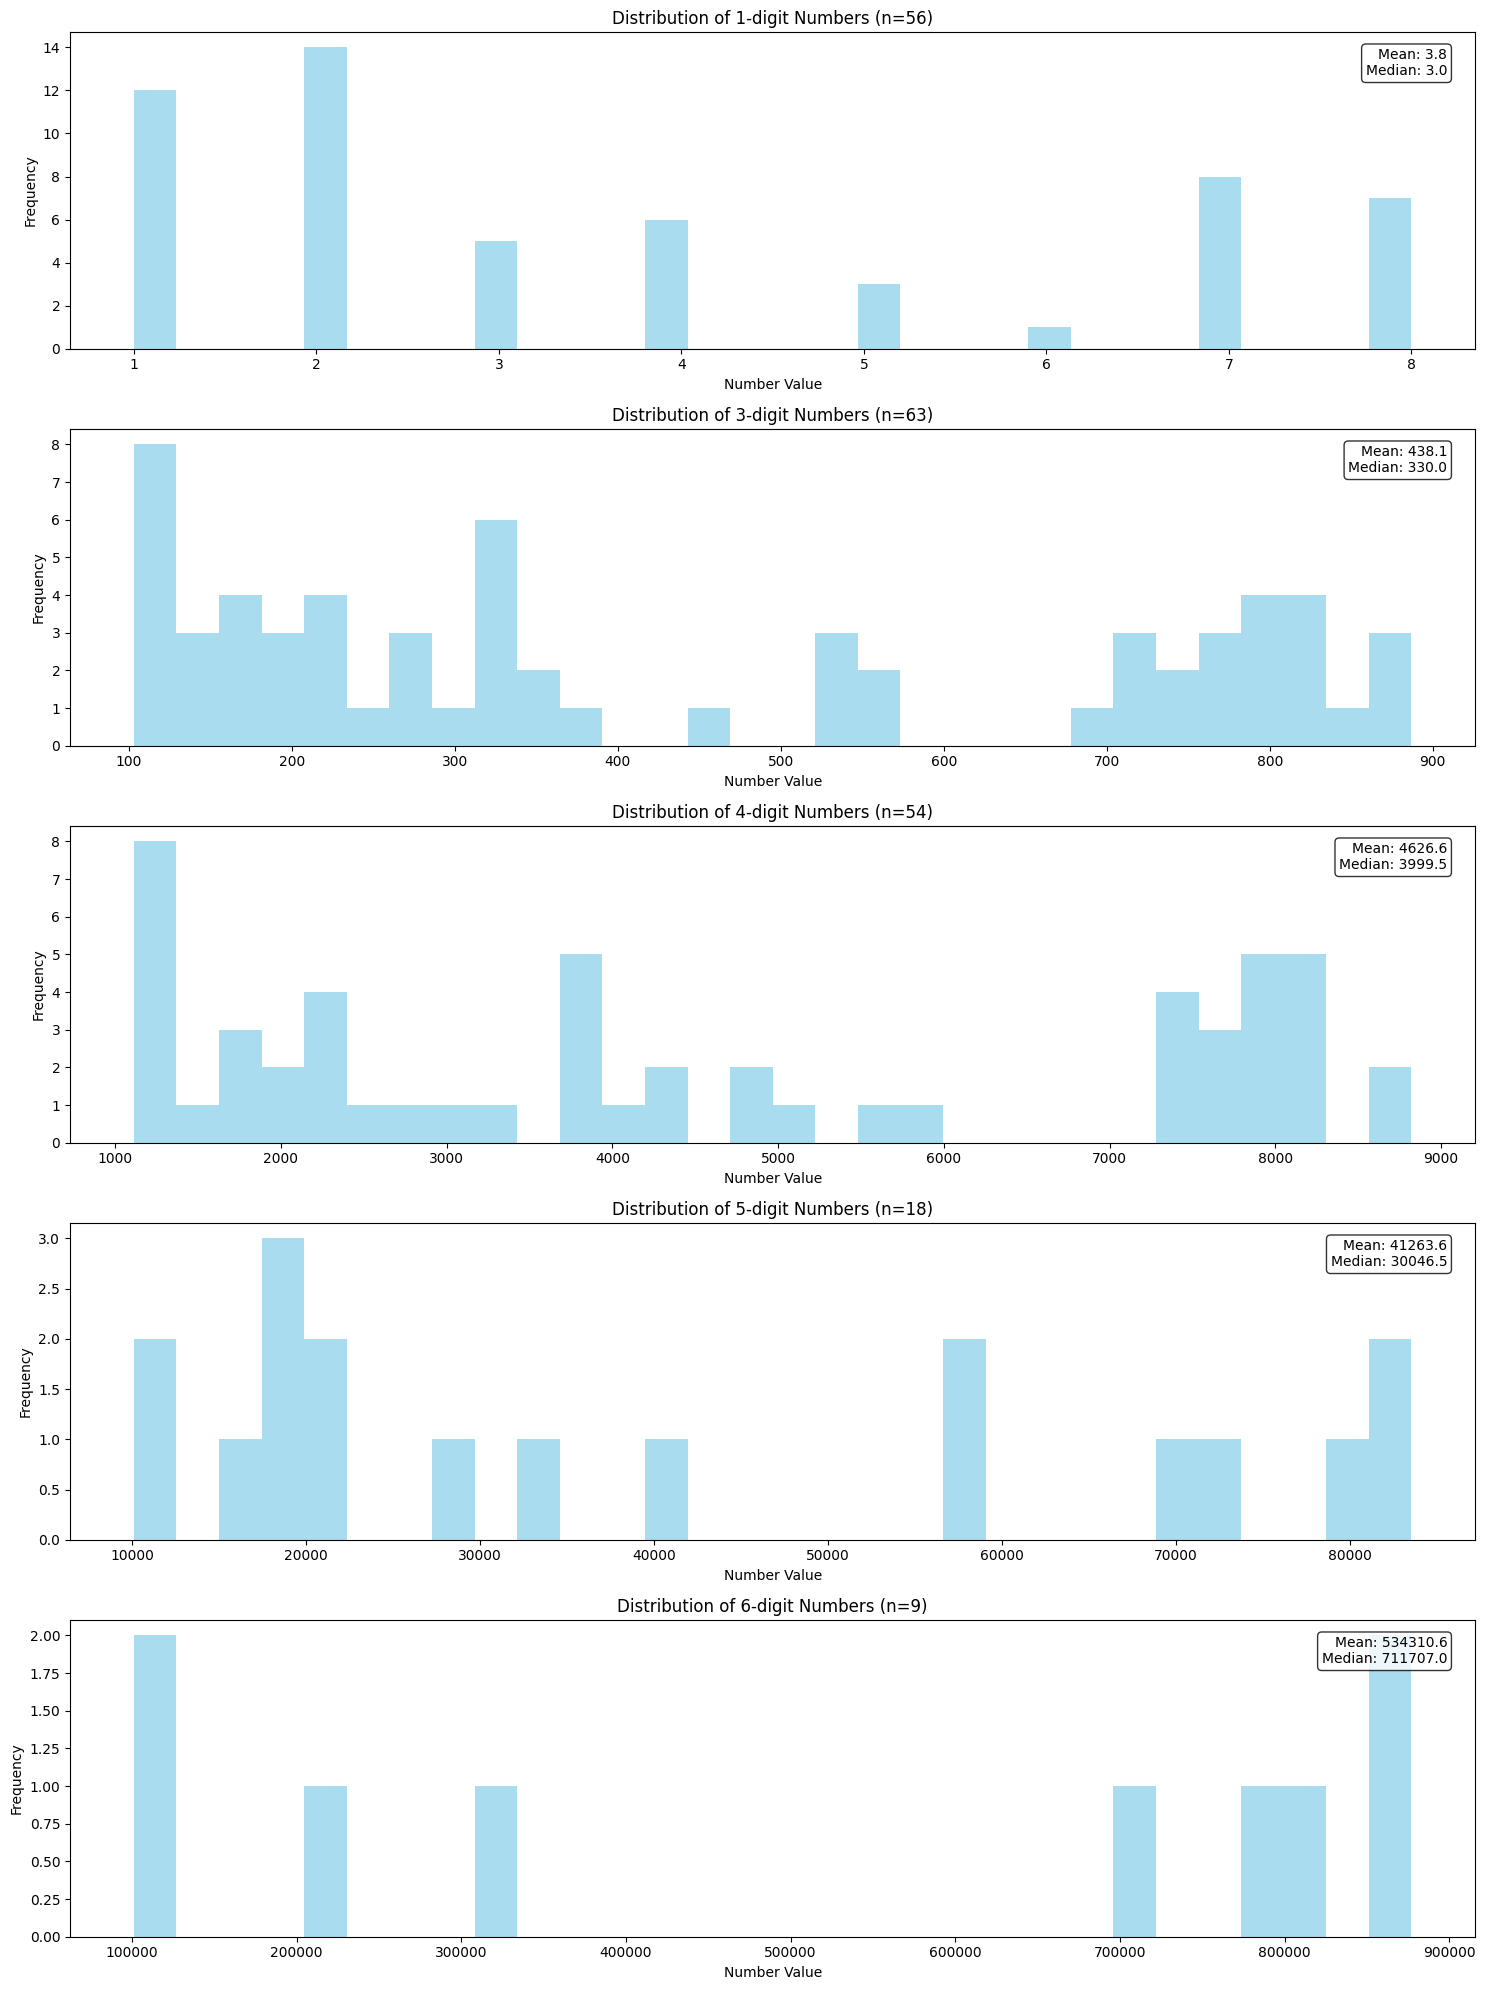

In [2]:
from util import plot_digit_distribution

plot_digit_distribution(numbers)